In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc, RocCurveDisplay
)

In [2]:
# Seaborn dataset 
import seaborn as sns
df = sns.load_dataset("titanic")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Selecting Important Features
# Keep important columns for prediction
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

print("After selecting features:", df.shape)
df.head()


After selecting features: (891, 8)


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
#Handle Missing Values 
# Age -> median
df['age'] = df['age'].fillna(df['age'].median())

# Embarked -> mode (most frequent)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df.isnull().sum()


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [7]:
# Split Features & Target
X = df.drop('survived', axis=1)
y = df['survived']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (891, 7)
y shape: (891,)


In [8]:
# Preprocessing (OneHot + Scaling)
# Identify numeric and categorical columns
num_cols = ['age', 'fare', 'sibsp', 'parch']
cat_cols = ['sex', 'embarked', 'pclass']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (712, 7)
Test size: (179, 7)


In [10]:
# Build Pipeline + Train Logistic Regression
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)
print("Model trained successfully")


Model trained successfully


In [11]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

y_pred[:10], y_prob[:10]


(array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64),
 array([0.06774018, 0.0481836 , 0.15631199, 0.03606854, 0.67246453,
        0.44126022, 0.7671515 , 0.30640444, 0.34439003, 0.17509414]))

In [12]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("----- Model Performance -----")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


----- Model Performance -----
Accuracy  : 0.8045
Precision : 0.7931
Recall    : 0.6667
F1-score  : 0.7244

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



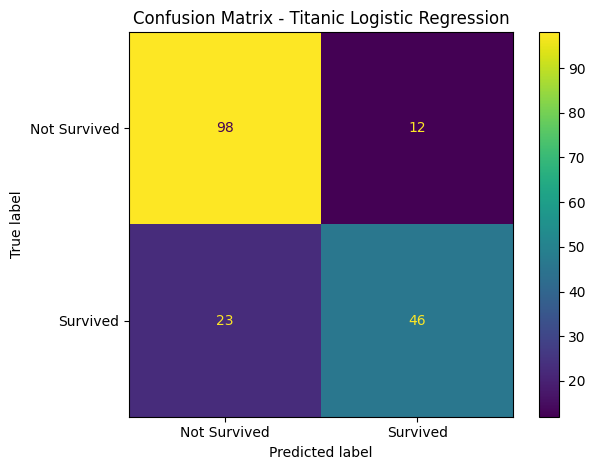

Saved: confusion_matrix.png


In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot(cmap=None)
plt.title("Confusion Matrix - Titanic Logistic Regression")
plt.grid(False)
plt.tight_layout()

# Save image for submission
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

print("Saved: confusion_matrix.png")


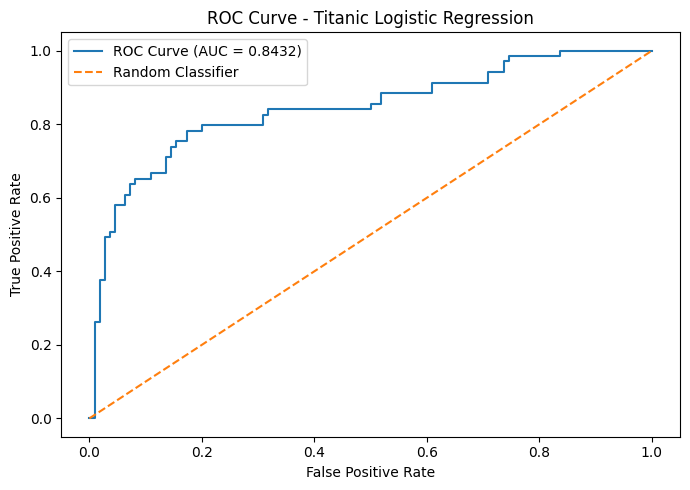

AUC Score: 0.8432
Saved: roc_curve.png


In [14]:
# ROC Curve + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Titanic Logistic Regression")
plt.legend()
plt.tight_layout()

# Save image for submission
plt.savefig("roc_curve.png", dpi=300)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")
print("Saved: roc_curve.png")
